In [1]:
import torch
from agent import DQN, ExponentialSchedule, train_dqn
from env import PokerEnvironment
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def moving_average(data, *, window_size=50):
    """Smooths 1-D data array using a moving average.

    Args:
        data: 1-D numpy.array
        window_size: Size of the smoothing window

    Returns:
        smooth_data: A 1-d numpy.array with the same size as data
    """
    assert data.ndim == 1
    if len(data) < window_size:
        return data
    kernel = np.ones(window_size)
    smooth_data = np.convolve(data, kernel) / np.convolve(np.ones_like(data), kernel)
    return smooth_data[: -window_size + 1]

In [2]:
env = PokerEnvironment()
gamma = 0.99

# We train for many time-steps; as usual, you can decrease this during development / debugging,
# but make sure to restore it to 1_500_000 before submitting
num_steps = 1_500_000
num_saves = 5  # Save models at 0%, 25%, 50%, 75% and 100% of training

replay_size = 200_000
replay_prepopulate_steps = 50_000

batch_size = 64
exploration = ExponentialSchedule(1.0, 0.05, 1_000_000)

model_class = DQN

# This should take about 1-2 hours on a generic 4-core laptop
dqn_models, returns, lengths, losses = train_dqn(
    env,
    num_steps,
    num_saves=num_saves,
    model=model_class,
    replay_size=replay_size,
    replay_prepopulate_steps=replay_prepopulate_steps,
    batch_size=batch_size,
    exploration=exploration,
    gamma=gamma,
)

assert len(dqn_models) == num_saves
assert all(isinstance(value, model_class) for value in dqn_models.values())

# Saving computed models to disk, so that we can load and visualize them later
checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
torch.save(checkpoint, f"models/checkpoint_poker_{num_steps}.pt")
np.savez(f"data_backups/{num_steps}_data.npz", arr1=returns, arr2=lengths, arr3=losses)

Episode: 1789 | Steps: 6 | Return: -0.50(-2.00  1.00) | Epsilon: 0.97: 100%|██████████| 10000/10000 [00:35<00:00, 282.11it/s] 


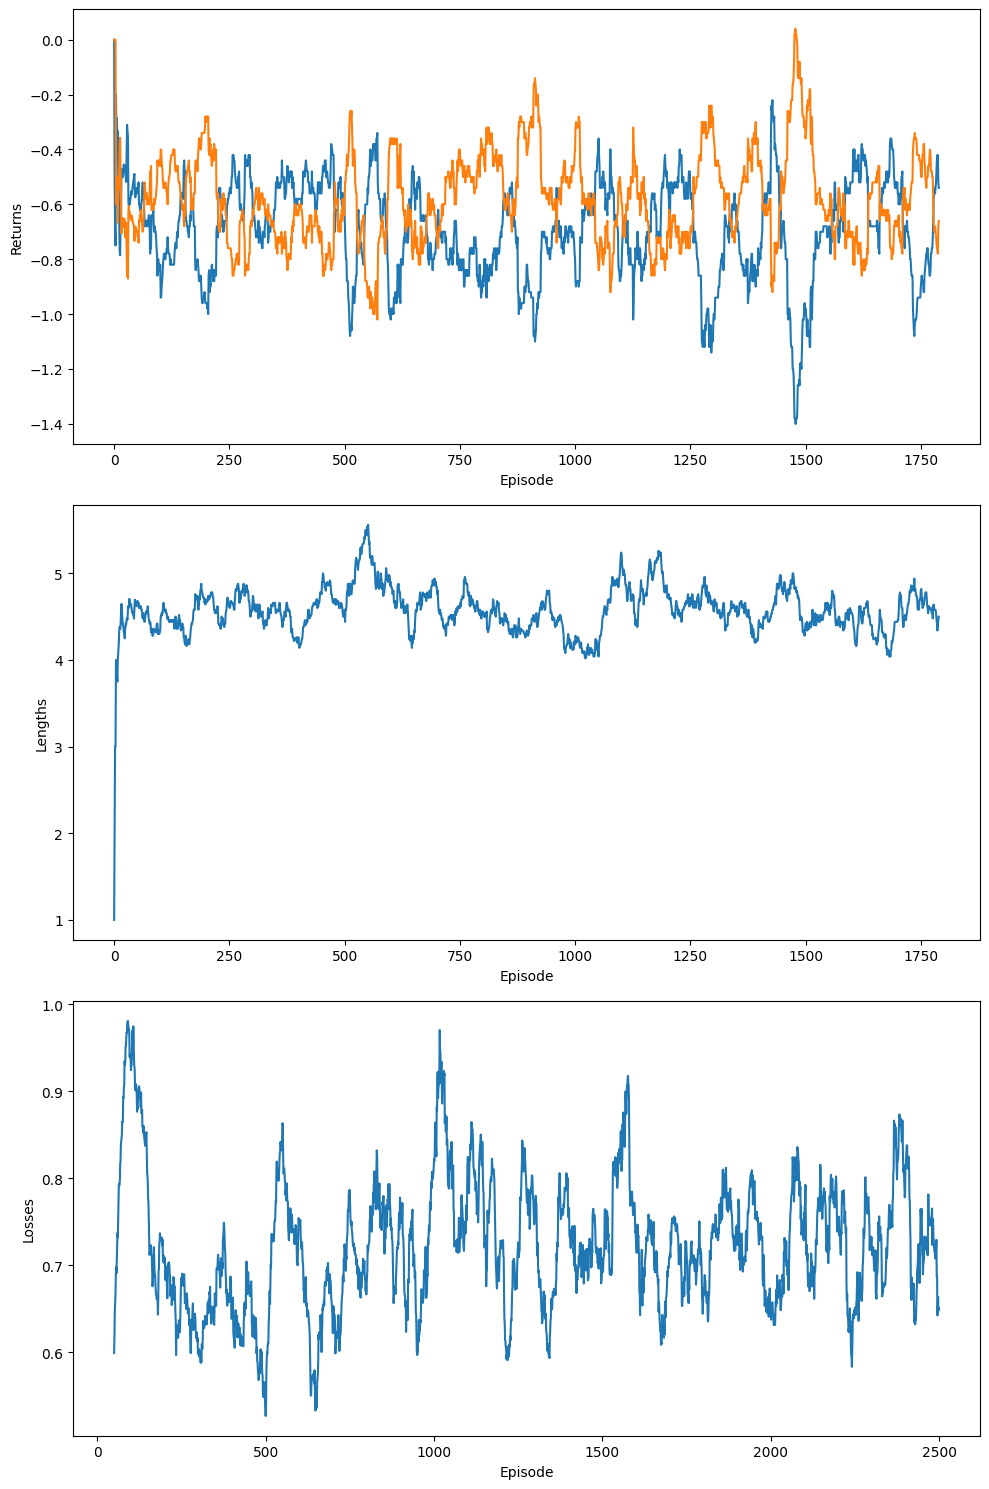

In [5]:
# YOUR PLOTTING CODE HERE
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for player_returns in returns:
    axs[0].plot(moving_average(player_returns, window_size=50))
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Returns")

axs[1].plot(moving_average(lengths, window_size=50))
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Lengths")

axs[2].plot(moving_average(losses, window_size=50))
axs[2].set_xlabel("Episode")
axs[2].set_ylabel("Losses")

plt.tight_layout()
plt.savefig(f"graphs/poker_training{num_steps}.png")
plt.show()

In [ ]:
env = PokerEnvironment()
gamma = 0.99

# We train for many time-steps; as usual, you can decrease this during development / debugging,
# but make sure to restore it to 1_500_000 before submitting
num_steps = 100_000
num_saves = 5  # Save models at 0%, 25%, 50%, 75% and 100% of training

replay_size = 1_500_000
replay_prepopulate_steps = 50_000

batch_size = 64
exploration = ExponentialSchedule(1.0, 0.05, 1_000_000)

model_class = DQN

# This should take about 1-2 hours on a generic 4-core laptop
dqn_models, returns, lengths, losses = train_dqn(
    env,
    num_steps,
    num_saves=num_saves,
    model=model_class,
    replay_size=replay_size,
    replay_prepopulate_steps=replay_prepopulate_steps,
    batch_size=batch_size,
    exploration=exploration,
    gamma=gamma,
)

assert len(dqn_models) == num_saves
assert all(isinstance(value, model_class) for value in dqn_models.values())

# Saving computed models to disk, so that we can load and visualize them later
checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
torch.save(checkpoint, f"models/checkpoint_poker_{num_steps}.pt")

In [ ]:
env = PokerEnvironment()
gamma = 0.99

# We train for many time-steps; as usual, you can decrease this during development / debugging,
# but make sure to restore it to 1_500_000 before submitting
num_steps = 100_000
num_saves = 5  # Save models at 0%, 25%, 50%, 75% and 100% of training

replay_size = 2_000_000
replay_prepopulate_steps = 50_000

batch_size = 64
exploration = ExponentialSchedule(1.0, 0.05, 1_250_000)

model_class = DQN

# This should take about 1-2 hours on a generic 4-core laptop
dqn_models, returns, lengths, losses = train_dqn(
    env,
    num_steps,
    num_saves=num_saves,
    model=model_class,
    model_num_layers=8,
    model_hidden_dim=1024,
    replay_size=replay_size,
    replay_prepopulate_steps=replay_prepopulate_steps,
    batch_size=batch_size,
    exploration=exploration,
    gamma=gamma,
)

assert len(dqn_models) == num_saves
assert all(isinstance(value, model_class) for value in dqn_models.values())

# Saving computed models to disk, so that we can load and visualize them later
checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
torch.save(checkpoint, f"models/checkpoint_poker_8x1024_{num_steps}.pt")

In [ ]:
env = PokerEnvironment()
gamma = 0.99

# We train for many time-steps; as usual, you can decrease this during development / debugging,
# but make sure to restore it to 1_500_000 before submitting
num_steps = 100_000
num_saves = 5  # Save models at 0%, 25%, 50%, 75% and 100% of training

replay_size = 5_000_000
replay_prepopulate_steps = 50_000

batch_size = 64
exploration = ExponentialSchedule(1.0, 0.05, 2_000_000)

model_class = DQN

# This should take about 1-2 hours on a generic 4-core laptop
dqn_models, returns, lengths, losses = train_dqn(
    env,
    num_steps,
    num_saves=num_saves,
    model=model_class,
    model_num_layers=50,
    model_hidden_dim=1024,
    replay_size=replay_size,
    replay_prepopulate_steps=replay_prepopulate_steps,
    batch_size=batch_size,
    exploration=exploration,
    gamma=gamma,
)

assert len(dqn_models) == num_saves
assert all(isinstance(value, model_class) for value in dqn_models.values())

# Saving computed models to disk, so that we can load and visualize them later
checkpoint = {key: dqn.custom_dump() for key, dqn in dqn_models.items()}
torch.save(checkpoint, f"models/checkpoint_poker_50x1024_{num_steps}.pt")